In [111]:
import pandas as pd

#데이터 전처리를 위한 임폴트
import numpy as np
import matplotlib.pylab as plt

# 시각화 라이브러리
import seaborn as sns

# 1.문제정의
- 어떤상황에서 물품이 제시간에 도착할수 있게 할지

- 0이 제시간에 도착, 1이 못도착

# 2. 데이터 수집

In [112]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train.head(100)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
1,2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
2,3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
3,4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
4,5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,B,Ship,2.0,3,226,3.0,medium,M,8.0,5106,1
96,97,F,Road,6.0,1,253,NaN,low,M,NaN,1962,0
97,98,B,?,NaN,3,151,3.0,medium,F,NaN,4025,1
98,99,D,Ship,7.0,4,309,4.0,low,M,NaN,1880,0


# 3.데이터 전처리

In [113]:
# id 를 인덱스로 변경하기
train=train.set_index('ID')
test=test.set_index('ID')

In [114]:
# train 결측치 확인
train.info()
 #Customer_care_calls,Prior_purchases ,Discount_offered

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB


In [115]:
train.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
count,5423.000000,6999.000000,6999.000000,6049.000000,3468.000000,6999.000000
mean,4.054582,3.023718,214.249178,3.576294,13.269031,0.594656
std,1.131019,2.149861,208.294273,1.530933,16.070188,0.490993
min,2.000000,1.000000,96.000000,2.000000,1.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,1.000000
max,7.000000,99.000000,9999.000000,10.000000,65.000000,1.000000


In [116]:
# test 결측치 확인
test.info()
 #Customer_care_calls,Prior_purchases ,Discount_offered 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   object 
 1   Mode_of_Shipment     4000 non-null   object 
 2   Customer_care_calls  3144 non-null   float64
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      3633 non-null   float64
 6   Product_importance   4000 non-null   object 
 7   Gender               4000 non-null   object 
 8   Discount_offered     2085 non-null   float64
 9   Weight_in_gms        4000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 343.8+ KB


In [117]:
test.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered
count,3144.000000,4000.000000,4000.00000,3633.000000,2085.000000
mean,4.055025,3.029250,212.86650,3.567300,13.282014
std,1.161132,2.573432,161.97119,1.522934,15.835045
min,2.000000,1.000000,96.00000,2.000000,1.000000
25%,3.000000,2.000000,170.00000,3.000000,4.000000
50%,4.000000,3.000000,214.50000,3.000000,7.000000
75%,5.000000,4.000000,251.00000,4.000000,10.000000
max,7.000000,99.000000,9999.00000,10.000000,65.000000


In [118]:
# train, test 의 Customer_care_calls 결측치 채우기
train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.013420,0.047041,0.173709,-0.158465,-0.070266
Customer_rating,0.013420,1.000000,-0.001961,0.008217,-0.016456,0.011275
Cost_of_the_Product,0.047041,-0.001961,1.000000,0.028947,-0.139349,-0.012811
Prior_purchases,0.173709,0.008217,0.028947,1.000000,-0.081868,-0.065160
Discount_offered,-0.158465,-0.016456,-0.139349,-0.081868,1.000000,0.397393
Reached.on.Time_Y.N,-0.070266,0.011275,-0.012811,-0.065160,0.397393,1.000000


In [119]:
train['Customer_care_calls'].value_counts()
train['Customer_care_calls']=train['Customer_care_calls'].fillna('0')
train['Customer_care_calls'].value_counts()

4.0    1756
3.0    1620
0      1576
5.0    1147
6.0     496
2.0     287
7.0     117
Name: Customer_care_calls, dtype: int64

In [120]:
test['Customer_care_calls'].value_counts()
test['Customer_care_calls']=test['Customer_care_calls'].fillna('0')
test['Customer_care_calls'].value_counts()

4.0    990
3.0    901
0      856
5.0    667
6.0    311
2.0    208
7.0     67
Name: Customer_care_calls, dtype: int64

In [121]:
# Prior_purchases 결측치 채우기
train['Prior_purchases'].value_counts()

3.0     2176
2.0     1423
4.0     1162
5.0      735
6.0      310
10.0     101
8.0       72
7.0       70
Name: Prior_purchases, dtype: int64

In [122]:
train['Prior_purchases']=train['Prior_purchases'].fillna('3.567300')
train['Prior_purchases'].value_counts()

3.0         2176
2.0         1423
4.0         1162
3.567300     950
5.0          735
6.0          310
10.0         101
8.0           72
7.0           70
Name: Prior_purchases, dtype: int64

In [123]:
test['Prior_purchases']=test['Prior_purchases'].fillna('3.567300')
test['Prior_purchases'].value_counts()

3.0         1293
2.0          866
4.0          723
5.0          414
3.567300     367
6.0          184
10.0          56
7.0           53
8.0           44
Name: Prior_purchases, dtype: int64

In [124]:
train['Discount_offered'].unique()

array([nan,  6.,  2.,  9.,  3., 34.,  7.,  1., 53.,  8., 63.,  4., 43.,
       60., 51.,  5., 10., 55., 17., 62., 15., 23., 38., 32., 39., 29.,
       45., 14., 52., 41., 58., 11., 50., 35., 28., 31., 24., 64., 61.,
       48., 65., 40., 18., 22., 56., 49., 21., 27., 20., 13., 30., 26.,
       54., 16., 57., 47., 42., 36., 37., 46., 19., 12., 25., 44., 33.,
       59.])

In [125]:
train['Discount_offered']=train['Discount_offered'].fillna('0')
test['Discount_offered']=test['Discount_offered'].fillna('0')

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

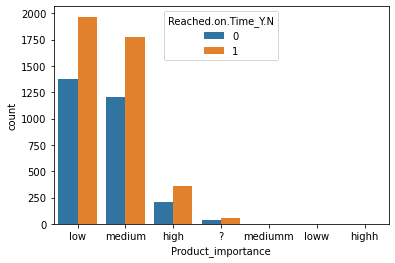

In [126]:
sns.countplot(data =train, # 사용할 데이터
              x='Product_importance', # X측으로 사용할 컬럼
             hue='Reached.on.Time_Y.N'# count에 대한 기준컬럼
             )

In [127]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      6999 non-null   object
 1   Mode_of_Shipment     6999 non-null   object
 2   Customer_care_calls  6999 non-null   object
 3   Customer_rating      6999 non-null   int64 
 4   Cost_of_the_Product  6999 non-null   int64 
 5   Prior_purchases      6999 non-null   object
 6   Product_importance   6999 non-null   object
 7   Gender               6999 non-null   object
 8   Discount_offered     6999 non-null   object
 9   Weight_in_gms        6999 non-null   object
 10  Reached.on.Time_Y.N  6999 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 976.2+ KB


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      6999 non-null   object
 1   Mode_of_Shipment     6999 non-null   object
 2   Customer_care_calls  6999 non-null   object
 3   Customer_rating      6999 non-null   int64 
 4   Cost_of_the_Product  6999 non-null   int64 
 5   Prior_purchases      6999 non-null   object
 6   Product_importance   6999 non-null   object
 7   Gender               6999 non-null   object
 8   Discount_offered     6999 non-null   object
 9   Weight_in_gms        6999 non-null   object
 10  Reached.on.Time_Y.N  6999 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 976.2+ KB


In [129]:
train.drop('Gender',axis=1,inplace=True)
test.drop('Gender',axis=1,inplace=True)

In [130]:
test.drop('Weight_in_gms',axis=1,inplace=True)
train.drop('Weight_in_gms',axis=1,inplace=True)

In [131]:
onehot_colums=['Mode_of_Shipment','Customer_care_calls','Prior_purchases',
               'Product_importance','Discount_offered']

In [132]:
for col in onehot_colums:
    # 원핫잍코딩한 컬럼 변수에 저장
        dummy=pd.get_dummies(train[col],prefix=col)
    
    # 원핫인코딩된 결과물을 기존의 자료와 합치기
        train=pd.concat([train,dummy],axis=1)# 데이터를 합쳐주는 합수
                                        # 옆으로 합치겠다
    # 기존글자형컬럼(원핫인코딩진행한) 삭제
        train.drop(col,axis=1,inplace=True)

In [133]:
for col in onehot_colums:
    # 원핫잍코딩한 컬럼 변수에 저장
    dummy=pd.get_dummies(test[col],prefix=col)
    
    # 원핫인코딩된 결과물을 기존의 자료와 합치기
    test=pd.concat([test,dummy],axis=1)# 데이터를 합쳐주는 합수
                                        # 옆으로 합치겠다
    # 기존글자형컬럼(원핫인코딩진행한) 삭제
    test.drop(col,axis=1,inplace=True)

In [134]:
print(train.shape)
print(test.shape)

(6999, 100)
(4000, 96)


In [135]:
set(test.columns)-set(train.columns)

set()

In [136]:
set(train.columns)-set(test.columns)

{'Mode_of_Shipment_ Flightzk',
 'Product_importance_highh',
 'Product_importance_loww',
 'Reached.on.Time_Y.N'}

In [137]:
test['Mode_of_Shipment_ Flightzk']=0
test['Product_importance_highh']=0
test['Product_importance_loww']=0
test['Reached.on.Time_Y.N']=0


In [138]:
set(train.columns)-set(test.columns)

set()

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(
                boston_df,
                house_price,
                test_size=0.3,
                random_state=3)

NameError: name 'boston_df' is not defined